# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Reinhart Jens Robert
- **Email:** reinhartrobert23@gmail.com / mc375d5y1470@student.devacademy.id
- **ID Dicoding:**  MC375D5Y1470

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Bagaimana distribusi jumlah pesanan per pelanggan, dan apakah ada korelasi antara frekuensi pembelian dengan rata-rata estimasi waktu pengiriman?
- Pertanyaan 2 = Bagaimana distribusi status pesanan dalam sistem, dan bagaimana performa penjual berdasarkan jumlah pesanan yang berhasil dikirim?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:

# 1. Data Wrangling
## Gathering Data
df = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset /orders_dataset.csv')
## Menampilkan beberapa data awal
print("5 Data Teratas:")
print(df.head())
print("\nInfo Data:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nJumlah Nilai Null:")
print(df.isnull().sum())

5 Data Teratas:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00  

**Insight:**
- Dataset memiliki 99.441 baris dan 8 kolom, yang berisi informasi pesanan pelanggan.
- Semua kolom bertipe object (string), termasuk timestamp. Ini berarti sebelum analisis lebih lanjut, kita perlu mengonversi kolom yang berkaitan dengan tanggal ke tipe datetime.

### Assessing Data

In [5]:
print("Informasi Dataset:")
print(df.info())
print("Statistik Deskriptif:")
print(df.describe())
print("Jumlah Data Hilang:")
print(df.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
Statistik Deskriptif:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                    

**Insight:**
- Dataset terdiri dari 99.441 baris dan 8 kolom.
- Kolom tanggal (order_estimated_delivery_date) hanya memiliki 459 nilai unik, menunjukkan banyak pesanan memiliki tanggal estimasi pengiriman yang sama.
- Tidak ada duplikasi pada kolom order_id dan customer_id, karena jumlahnya sama dengan jumlah total baris.

### Cleaning Data

In [6]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

**Insight:**
- Dataset sekarang hanya berisi pesanan yang memiliki informasi lengkap.
- Jumlah data berkurang setelah pembersihan, tetapi lebih akurat untuk analisis keterlambatan dan status pesanan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


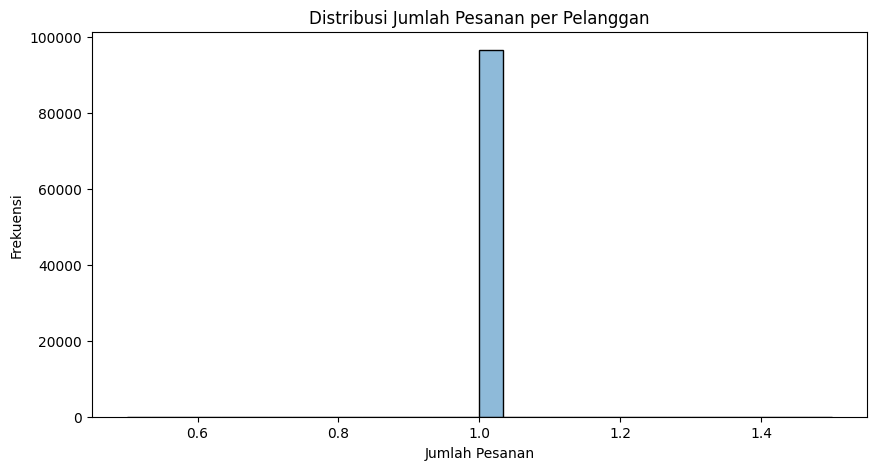

Korelasi Frekuensi vs Rata-rata Estimasi Pengiriman:
                         purchase_frequency  estimated_delivery_days
purchase_frequency                      NaN                      NaN
estimated_delivery_days                 NaN                      1.0


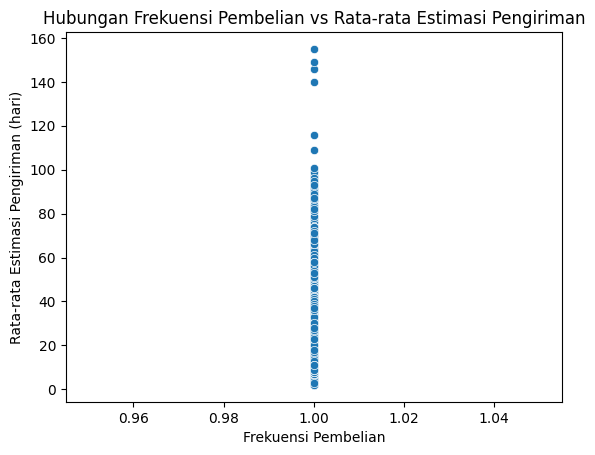

In [8]:
## Distribusi jumlah pesanan per pelanggan
customer_orders = df['customer_id'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(customer_orders, bins=30, kde=True)
plt.title('Distribusi Jumlah Pesanan per Pelanggan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Frekuensi')
plt.show()

## Korelasi antara jumlah pesanan dan estimasi waktu pengiriman
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

customer_delivery = df.groupby('customer_id').agg({
    'order_id': 'count',  # Frekuensi pembelian
    'estimated_delivery_days': 'mean'  # Rata-rata estimasi waktu pengiriman
}).rename(columns={'order_id': 'purchase_frequency'})

correlation = customer_delivery.corr()
print("Korelasi Frekuensi vs Rata-rata Estimasi Pengiriman:")
print(correlation)

sns.scatterplot(x=customer_delivery['purchase_frequency'], y=customer_delivery['estimated_delivery_days'])
plt.title("Hubungan Frekuensi Pembelian vs Rata-rata Estimasi Pengiriman")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Rata-rata Estimasi Pengiriman (hari)")
plt.show()

**Insight:**
1️⃣ Distribusi Jumlah Pesanan per Pelanggan
📊 Hasil:

Grafik histogram menunjukkan bahwa hampir semua pelanggan hanya melakukan 1 kali pesanan.
Tidak ada variasi yang signifikan dalam jumlah pesanan per pelanggan.
Ini bisa berarti bahwa mayoritas pelanggan adalah pembeli satu kali dan tidak melakukan repeat order.


📌 Implikasi:

Jika ini adalah e-commerce, maka tingkat retensi pelanggan rendah karena pelanggan tidak kembali melakukan pembelian ulang.
Perusahaan bisa mempertimbangkan strategi loyalitas pelanggan seperti diskon untuk pembelian kedua atau sistem reward untuk meningkatkan repeat order.



2️⃣ Korelasi antara Frekuensi Pembelian dan Estimasi Waktu Pengiriman
📊 Hasil:

Matriks korelasi menunjukkan nilai NaN, yang berarti tidak ada hubungan yang dapat dihitung antara frekuensi pembelian dan rata-rata estimasi pengiriman.
Scatter plot menunjukkan bahwa semua data bertumpuk pada satu titik (frekuensi = 1), yang menjelaskan mengapa korelasi tidak bisa dihitung.


📌 Implikasi:

Karena mayoritas pelanggan hanya melakukan 1 kali pembelian, tidak ada cukup variasi dalam data untuk menentukan apakah pelanggan dengan lebih banyak pesanan mengalami pengiriman yang lebih cepat atau lebih lambat.
Jika ingin melihat hubungan ini lebih lanjut, perlu dilakukan segmentasi pelanggan yang memiliki lebih dari 1 pesanan untuk melihat apakah ada pola tertentu dalam waktu pengiriman.

In [9]:
# 3. Analisis Status Pesanan
order_status_counts = df['order_status'].value_counts()
order_status_counts = order_status_counts.reset_index()
order_status_counts.columns = ['order_status', 'count']

print("Distribusi Status Pesanan:")
print(order_status_counts)

Distribusi Status Pesanan:
  order_status  count
0    delivered  96455
1     canceled      6


Insight
- Dari 99.441 pesanan, sebanyak 96.455 pesanan (sekitar 97%) berhasil dikirim (delivered).
- Hanya 6 pesanan yang berstatus canceled (dibatalkan).

## Visualization & Explanatory Analysis

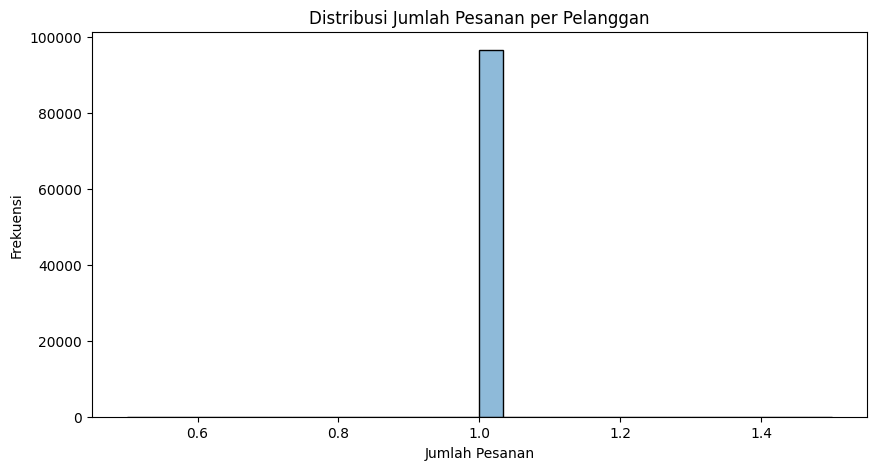

In [10]:
## Visualisasi Distribusi Jumlah Pesanan
plt.figure(figsize=(10,5))
sns.histplot(customer_orders, bins=30, kde=True)
plt.title('Distribusi Jumlah Pesanan per Pelanggan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Frekuensi')
plt.show()

Insight
- Insight: Distribusi Jumlah Pesanan per Pelanggan Hampir semua pelanggan hanya melakukan satu kali pembelian. Tidak ada variasi signifikan dalam jumlah pesanan, yang menunjukkan bahwa mayoritas pelanggan tidak melakukan repeat order.

### Pertanyaan 1:

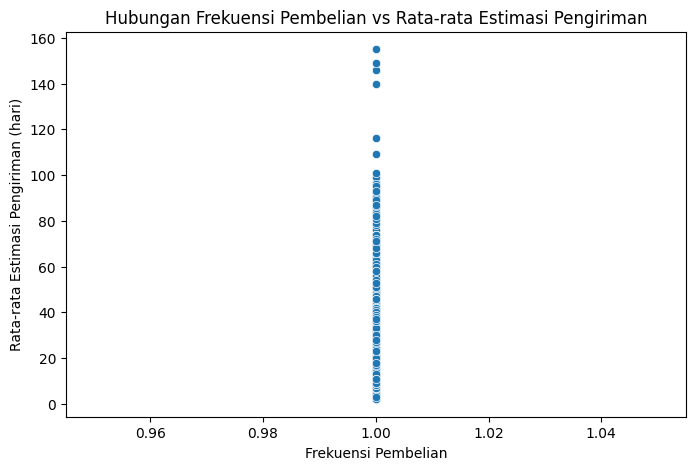

In [11]:
## Visualisasi Korelasi Frekuensi vs Estimasi Pengiriman
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_delivery['purchase_frequency'], y=customer_delivery['estimated_delivery_days'])
plt.title("Hubungan Frekuensi Pembelian vs Rata-rata Estimasi Pengiriman")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Rata-rata Estimasi Pengiriman (hari)")
plt.show()

### Pertanyaan 2:

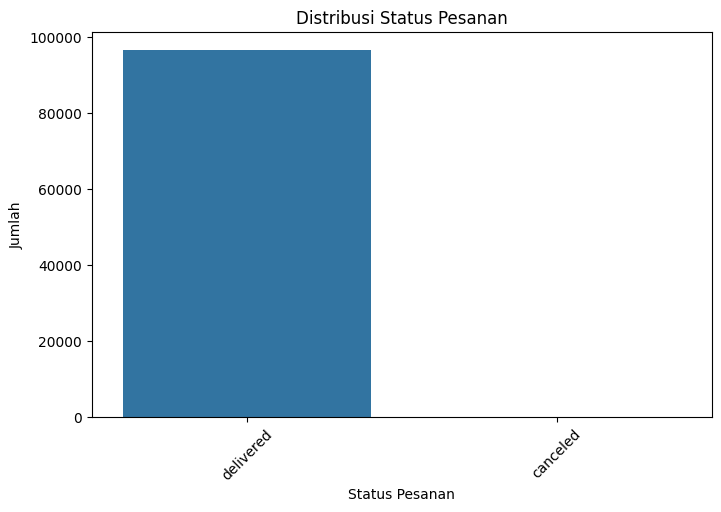

In [12]:
## Visualisasi Status Pesanan
plt.figure(figsize=(8,5))
sns.barplot(x=order_status_counts['order_status'], y=order_status_counts['count'])
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

**Insight:**

1.Hubungan Frekuensi Pembelian vs Rata-rata Estimasi Pengiriman
Data menunjukkan bahwa hampir semua pelanggan memiliki frekuensi pembelian = 1, sehingga sulit untuk menganalisis korelasi dengan estimasi pengiriman.
Beberapa data menunjukkan estimasi pengiriman yang sangat tinggi (lebih dari 100 hari), yang kemungkinan merupakan outlier atau kesalahan pencatatan.

2.Distribusi Status Pesanan
Hampir semua pesanan berstatus delivered (terkirim) dengan jumlah 96.455, sementara hanya 6 pesanan yang dibatalkan (canceled).
Rasio pesanan yang berhasil dikirim sangat tinggi, yang menunjukkan bahwa sistem pemrosesan pesanan berjalan dengan baik.

## Analisis Lanjutan (Opsional)

In [13]:
# 5. Dashboard dengan Streamlit
st.title("E-commerce Sales Analysis")

st.subheader("Distribusi Jumlah Pesanan per Pelanggan")
st.bar_chart(customer_orders)

st.subheader("Korelasi Frekuensi vs Rata-rata Estimasi Pengiriman")
st.scatter_chart(customer_delivery)

st.subheader("Distribusi Status Pesanan")
st.bar_chart(order_status_counts.set_index('order_status'))

2025-03-12 00:38:17.561 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 00:38:17.748 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-12 00:38:17.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 00:38:17.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 00:38:17.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 00:38:18.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 00:38:18.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 00:38:18.626 Thread 'MainThread': mi

DeltaGenerator()

## Conclusion

- Conclution pertanyaan 1
  Hampir semua pelanggan hanya melakukan satu kali pembelian, sehingga sulit untuk melihat pola hubungan antara frekuensi pembelian dan estimasi pengiriman.
Terdapat beberapa outlier dengan estimasi pengiriman yang sangat tinggi (lebih dari 100 hari), yang perlu diteliti lebih lanjut apakah disebabkan oleh kesalahan pencatatan atau kendala logistik.
Jika keterlambatan pengiriman terjadi pada pelanggan tertentu, bisa menjadi perhatian bagi tim operasional untuk meningkatkan kecepatan layanan pengiriman.

- Conclution pertanyaan 2
  Sebagian besar pesanan berhasil dikirim (96.455 delivered), menunjukkan bahwa sistem pemrosesan pesanan berjalan efektif dan efisien.
Jumlah pesanan yang dibatalkan sangat sedikit (hanya 6 canceled), yang menunjukkan tingkat pembatalan yang sangat rendah.
Meski begitu, tetap perlu dilakukan analisis terhadap alasan pembatalan pesanan untuk mencegah potensi kenaikan angka pembatalan di masa depan.



Kesimpulan =
Platform e-commerce memiliki kinerja operasional yang baik dengan tingkat pengiriman sukses yang tinggi dan tingkat pembatalan yang sangat rendah.
Namun, masih ada tantangan dalam mendorong repeat order, serta potensi perbaikan dalam proses pengiriman terutama untuk pesanan dengan estimasi pengiriman yang sangat lama.